# Test del $\chi^2$

Il test del $\chi^2$ ha come scopo escludere l'ipotesi nulla ($H_0$) che un certo campione di dati segua un modello le cui incertezze si possono approssimare come gaussiane:

$\displaystyle \chi^2 = \sum_{i=1}^n\frac{(x_i^{\mathrm{obs}}-\hat{x}_i)^2}{\sigma_i^2}$

Implicitamente, si considera una ipotesi alternativa $H_1$, non ben specificata, nella quale la distirbuzione del $\chi^2$ tenda ad avere valori molto maggiori rispetto all'ipotesi $H_0$, quindi un $p$-value molto più piccolo.

## Distribuzione $\chi^2$

Abbiamo già visto che se abbiamo $k$ variabili distribuite secondo una normale standard (ossia con $\mu=0$ e $\sigma=1$), la loro somma è una variabile $\chi^2$ che segue una distribuzione nota:

$\displaystyle p(\chi^2;k) = \frac{2^{-k/2}}{\Gamma(k/2)}\chi^{k-2}e^{-\chi^2/2}$

La distribuzione ha valore atteso $k$ e varianza $2k$.

Di particolare rilevanza, vedremo, è la sua distribuzione cumulativa che è calcolabile numericamente con funzioni di libreria.

$k$ prende il nome di **numero di gradi di libertà**, e il motivo sarà più chiaro nel seguito.

Come "corollario" della proprietà che la varianza di una variabile casuale $\chi^2$ vale $2k$, si può dimosrare che la varianza della stima della varianza vale:

$\displaystyle \mathbb{V}\mathrm{ar}[s^2_n] = \frac{2\sigma^4}{n-1}$

dove:

$\displaystyle s_n^2 = \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2 = \frac{\sigma^2}{n-1}\sum_{i=1}^n\frac{(x_i-\bar{x})^2}{\sigma^2}=\frac{\sigma^2}{n-1}\chi^2_{n-1}$

Quindi:

$\displaystyle \mathbb{V}\mathrm{ar}[s_n^2] = \left(\frac{\sigma^2}{n-1}\right)^2\mathbb{V}\mathrm{ar}[\chi^2_{n-1}] = 2(n-1)\left(\frac{\sigma^2}{n-1}\right)^2  = \frac{2\sigma^4}{n-1}$


Quindi la deviazione standard di $s_n^2$ è:

$\displaystyle \sigma_{s^2_n} = \sqrt{\frac{2}{n-1}}\sigma^2$

La deviazione standard di $s_n$ si può calcolare tenendo conto che la radice quadrate di una variabile $\chi^2$ viene chiamata variabile $\chi$ ed ha una distribuzione [nota](https://mathworld.wolfram.com/ChiDistribution.html), con valor medio e deviazione standard che dipendono in modo non banale dal numero di gradi di libertà.

Un calcolo approssimato e semplificato si può ottenere con la propagazione degli errori:

$\displaystyle \sigma_{\sqrt{x}} = \frac{\sigma_x}{2\sqrt{x}}$

$\displaystyle \sigma_{s_n} = \frac{\sigma_{s_n^2}}{2 s_n}$


da cui:

$\displaystyle \sigma_{s_n} = \sqrt{\frac{1}{2(n-1)s^2_n}}\sigma^2 \simeq \sqrt{\frac{1}{2(n-1)}}{s_n}$

o anche:

$\displaystyle \frac{\sigma_{s_n}}{s_n} \simeq {\frac{1}{\sqrt{2(n-1)}}}$

Scendere sotto un errore relativo di $s_n$ del per cento, quindi, richiede $n$ superiore o uguale a 5001, che usualmente non è facile ottenere. Con $n=51$ si ottiene un errore relativo del 10%.

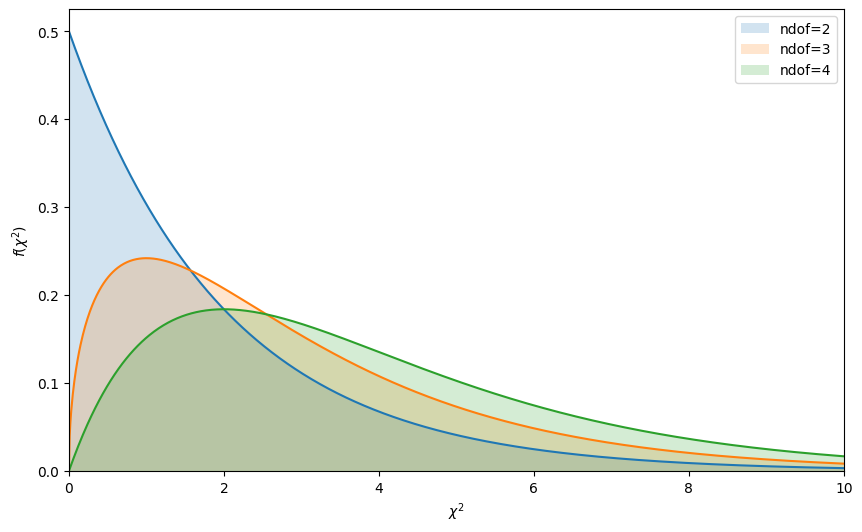

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
plt.figure(figsize=(10,6),dpi=100)
step = 0.01
xmin,xmax = 0,10
x = np.arange(xmin, xmax+step, step)
for ddof in (2, 3, 4):
    y = chi2.pdf(x, ddof)
    plt.fill_between(x, y, alpha=0.2,linewidth=2, label='ndof={:d}'.format(ddof))
    plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(bottom=0)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.legend()
plt.show()

## Costruzione del $\chi^2$

Dato un numero $k$ di variabili $x_1,\cdots,x_k$ distribuite in maniera normale, si può costruire una variable $\chi^2$ come segue:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\mu_i)^2}{\sigma_i^2}$

In presenza di una matrice di correlazione inversa $C_{ij}^{-1}$ non diagonale, si può ancora definire una variabile $\chi^2$ come segue:

$\displaystyle \chi^2 = \sum_{i,j=1}^k (x_i-\mu_i)C_{ij}^{-1}(x_j-\mu_j)$

In particolare, se invece i valori attesi $\mu_i$ sono tutti uguali a $\mu$ così come le deviazioni standard $\sigma_i$ sono tutte uguali a $\sigma$, la variabile $\chi^2$ diventa:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\mu)^2}{\sigma^2}$

Nel caso in cui $\mu$ non è noto e viene stimato come $\hat{\mu} = \bar{x} = \frac{1}{N}\sum_{i=1}^kx_i$, si può ancora definire una variabile $\chi^2$ come:

$\displaystyle \chi^2 = \sum_{i=1}^k\frac{(x_i-\hat{\mu})^2}{\sigma^2}$

ma si può dimostrare che è distribuita come una variabile $\chi^2$ con numero di gradi di libertà pari a $k-1$ anziché $k$.

In generale, ogni volta che si utilizzano, nella definizione del $\chi^2$, parametri stimati dal campione di dati $x_1,\cdots,x_k$, la variabile $\chi^2$ segue una distribuzione con un numero di gradi di libertà pari a $k$ meno il numero di parametri stimati.

## Test del $\chi^2$

Dato un campione, si considera l'ipotesi $H_0$ che il campione segua la distribuzione normale che viene assunta, ossia con i parametri noti o stimati che abbiamo a disposizione.

Si usa come *test statistic* proprio il valore dei $\chi^2$, che segue la distribuzione nota che abbiamo detto *nell'ipotesi che il campione segua la distribuzione normale*. 

*Implicitamente, come ipotesi alternativa $H_1$ consideriamo che il campione segua un'altra distribuzione, diversa da quella normale. Se ci saranno importanti deviazioni, al quadrato, queste farnno aumentare di molto il valore del $\chi^2$, almeno come valore atteso.*

L'ipotesi $H_0$ viene quindi scartata se $\chi^2>\chi^2_{\mathrm{cut}}$, dove $\chi^2_{\mathrm{cut}}$ è il valore che corrisponde al livello di significatività $\alpha$ voluto, tipicamente 5% o 10%:

$\alpha = 1- F(\chi^2_{\mathrm{cut}};k)$

Il $p$-value, di conseguenza, sarà dato dalla probabilità che il $\chi^2$ abbia un valore maggiore o uguale a quanto sservato, $\chi^2_{\mathrm{obs}}$, ossia uno meno la funzione cumulativa:

$p = 1- F(\chi^2_{\mathrm{obs}};k)$

Escludere $\chi^2>\chi^2_{\mathrm{cut}}$ equivale ad escludere $p<\alpha$.

Valori tipici di $\alpha$ sono $10\%$, $5\%$,  $1.35\times 10^{-3}$ ($3\sigma$, *evidence*) e $2.87\times 10^{-7}$ ($5\sigma$, *observation*).

## Bontà del fit

Il testi del $\chi^2$ viene anche utilizzato per misurare la *bontà del fit*. Se il $p$-value risultasse troppo basso si potrebbe escludere che i dati seguano il modello assunto per interpolare i dati.

<span style="color:red">**Attenzione:** in alcuni contesti, ad esempio quando si usa la funzione Confrontiamo con [```scipy.stats.linregres```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), il $p$-value che viene restituito **non** corrisponde al test di bontà del fit. Nel caso specifico,il $p$-value è relativo al test che rigetta l'ipotesi che le misure $y_i$ siano scorrelate dalle misure $x_i$, ossia che sia $R^2=0$.
</span>

### Caveat per fit di massima verosimiglianza

<span style="color:red">**Attenzione:** se si fa un fit di massima verosimiglianza (es.: un fit unbinned), il valore di $-2\log{\cal L}$ non segue necessariamente la distribuzione del $\chi^2$.</span>

In generale, $-2\log{\cal L}$ non può essere usato per stimare la bontà del fit. 

Esistono altri stimatori (es.: *profile likelihood*) che seguono, almeno approssimativamente, la distribuzione del $\chi^2$, ma non li vedremo in questo corso.

## Confronto di proporzioni e applicazioni mediche

Il test del $\chi^2$ si usa per confrontare le proporzioni su due o più campioni, che tipicamente si confrontano con un metodo tabellare. L'esempio renderà evidente l'applicazione.

Immaginiamo di avere diverse categorie (es.: per i passeggeri del Titanic: maschi e femmine, 1^, 2^ e 3^ classe, ecc.)

Per ciascuna categoria contiamo il numero di casi in cui si verifica un evento oppure no. L'evento può essere l'esito: "sopravvissuto" o "morto".

Per ognuna delle $k$ categorie, che indichiamo con $i$, conosciamo il numero di casi $n_i$ per cui si verifica l'evento ed il totale dei casi $N_i$.

Possiamo anche stimare la frazione di casi *media* per cui si verifica l'evento, ossia:

$\displaystyle \hat{p} =\frac{\sum_{i=1}^k n_i}{\sum_{i=1}^k N_i} = \frac{n}{N}$

Da qui possiamo calcolare il valore *atteso* se ciascuna categoria avesse un valore corrispondente alla media:

$n_i^{\mathrm{exp}} = \hat{p} N_i$

Costruiamo quindi il $\chi^2$ come:

$\displaystyle\chi^2 = \sum_{i=1}^k \frac{(n_i - n_i^{\mathrm{exp}})^2}{n_i^{\mathrm{exp}}}$

Questa definizione, con il valore atteso al denominatore, è detto *$\chi^2$ di Pearson*.
Invece il *$\chi^2$ di Neyman* usa $n_i$ al denominatore.

Siccome la stima $\hat{p} = \sum_{i=1}^kn_i/N$ è determinata dallo stesso campione, il numero di gradi di libertà sarà $k-1$.

Analoga procedura si potrà applicare per testare se le frazioni osservate corrispondono a valori attesi noti $p_i$.

I termini al denominatore $n_i^{\mathrm{exp}}$ vengono dall'ipotesi che la distribuzione di $n_i$ sia poissoniana e che per questa si possa fare l'approssimazione gaussiana. In realtà, la distribuzione di $n_i$ spesso è binomiale. La discussione sull'opportunità di usare questo denominatore o altro, a seconda del caso, viene rimandata a testi più specifici.

## $\chi^2$ per il caso binomiale con due categorie

Assumiamo per semplicità un test binomiale con $k=2$ e vogliamo testare che i valori di probabilità siano $p_1$ e $p_2$, che assumiamo veri.
Ad esempio, se vogliamo dimostrare che una moneta non sia truccata, possiamo testare i valori $p_1=p_2=1/2$.

Secondo la distribuzione binomiale, i valori attesi e le varianze sono:

$\mathbb{E}[n_i] = N p_i,\ \mathbb{V}\mathrm{ar}[n_i] = N p_i(1-p_i), \ i= 1, 2$

ed in particolare:

$\mathbb{V}\mathrm{ar}[n_1] = N p_1(1-p_1) = N p_2(1-p_2)$

Possiamo approssimare, usando il teorema del limite centrale, la significatività quadra $Z^2$ come:

$\displaystyle Z_1^2 = \frac{(n_1 - \mathbb{E}[n_1])^2}{\mathbb{V}\mathrm{ar}[n_1]} = \frac{(n_1 - N p_1)^2}{N p_1(1-p_1)} = \frac{(n_1 - N p_1)^2}{N p_1(1-p_1)} [(1-p_1) + p_1] = \frac{(n_1 - N p_1)^2}{N p_1}  + \frac{(n_1 - N p_1)^2}{N (1-p_1)} = $

$\displaystyle = \frac{(n_1 - N p_1)^2}{N p_1}  + \frac{[(N - n_1) - N ( 1 - p_1)]^2}{N p_2} = 
\frac{(n_1 - N p_1)^2}{N p_1}  + \frac{(n_2 - N p_2)^2}{N p_2} = \chi^2$

Va notato che, in questo caso:

$\displaystyle Z_2^2 = \frac{(n_2 - \mathbb{E}[n_2])^2}{\mathbb{V}\mathrm{ar}[n_2]} = Z_1^2 = \chi^2$

## Test delle ipotesi

Possiamo prendere come ipotesi $H_0$ quella che gli esiti siano tutti uguali tra siverse categorie. 
Ad esempio: che la probabilità di sopravvivere sul Titanic sia la stessa per uomini o donne, oppure per passageri di 1^, 2^ e 3^ classe.

## Test di indipendenza in una *contingency table*

In una tabella con $I$ righe e $J$ colonne, se si può assumere che gli esiti siano indipendenti, in ciascuna cella la probabilità risulta: $p_{ij} = p^{\mathrm{C}}_i p^{\mathrm{R}}_j$.

In questa formula, $p^{\mathrm{C}}_i$ e $p^{\mathrm{R}}_j$ si possono stimare come frequenza per righe e per colonne:

$\displaystyle\hat{p}_i^{\mathrm{C}} = \sum_{j=1}^J \hat{p}_{ij}$

$\displaystyle\hat{p}_j^{\mathrm{R}} = \sum_{i=1}^I \hat{p}_{ij}$

Si ottiene quindi un $\chi^2$ definito come:

$\displaystyle\chi^2 = \sum_{j=1}^J \sum_{i=1}^I \frac{(n_{ij} - N\hat{p}_i^{\mathrm{C}}\hat{p}_j^{\mathrm{R}})^2}{N\hat{p}_i^{\mathrm{C}}\hat{p}_j^{\mathrm{R}}}$

Assumendo una distribuzione multinomiale (la generalizzazione a più di due categorie di una distribuzione binomiale), si può dimostrare che il $\chi^2$ così costruito segue asintoticamente una distribuzione di chi quadro con $(I-1)\times(J-1)$ gradi di libertà.

In sostanza: esistono diversi test in letteratura, tutti validi approssimativamente sotto alcune ipotesi.

L'uso dell'uno o dell'altro dipende dal caso specifico. Qui abbiamo considereremo solo alcuni casi a titolo di esempio.

## Mortalità sul Titanic

Consideriamo i dati dei passeggeri del Titanic, già considerati in un altro notebook.

Ci potremmo chiedere se un modello binomiale non sia più appropriato di un modello poissoniano, visto che il numero di passeggeri (maschi, femmine, di 1^, 2^ o 3^ classe) è fissato.

Per ora usiamo la procedura in maniera pedissequa, a titolo di esempio. Usare il modello poissoniamo tiene conto anche delle possibili fluttuazioni del "denominatore", ossia del numero totale di casi per ciascuna categoria, visto che in un eventuale nuovo viaggio di un transatlantico questa quantità potrebbe cambiare.

Il numero di gradi di libertà è 2 (maschi, femmine) - 1 (il totale si ottiene dalla somma dei due).

Si potrebbe anche usare il test di indipendenza per *contingency table* descritto sopra, ma è lievemente più complesso nel calcolo.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/titanic passenger list.csv')

In [4]:
contigency= pd.crosstab(df['sex'], df['survived'])

In [5]:
contigency

survived,0,1
sex,,
female,127,339
male,682,161


Usiamo [```seaborn```](https://seaborn.pydata.org/) per visualizzare la mappa colorata, è un po' più sintetico di quanto abbiamo fatto con l'esercizio sul Titanic.

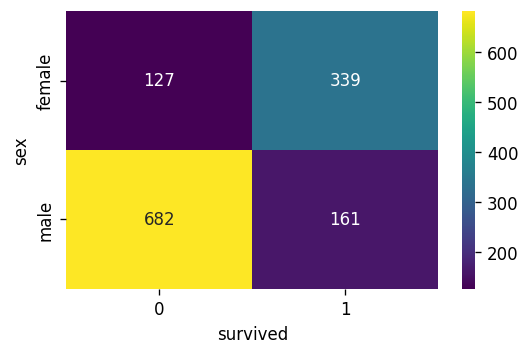

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3), dpi=120)
sns.heatmap(contigency, annot=True, fmt="d", cmap="viridis")
plt.show()

Le percentuali si possono ottenere con l'opzione ```normalize```.

In [8]:
contigency_pct = pd.crosstab(df['sex'], df['survived'], normalize='index')
contigency_pct

survived,0,1
sex,,
female,0.272532,0.727468
male,0.809015,0.190985


Completiamo la tabella con la somma di tutte le righe:

In [9]:
c_tab = contigency.copy()
c_tab.loc["all"] = c_tab.sum()
c_tab

survived,0,1
sex,,
female,127,339
male,682,161
all,809,500


In [10]:
c_tab['tot']=c_tab[0]+c_tab[1]
c_tab['frac_0'] = c_tab[0]/(c_tab['tot'])
c_tab['frac_1'] = c_tab[1]/(c_tab['tot'])
frac_0_all = c_tab.at['all','frac_0']
frac_1_all = c_tab.at['all','frac_1']
print('dead fraction: {:.3f}'.format(frac_0_all))
print('survived fraction: {:.3f}'.format(frac_1_all))
c_tab['exp_0']=frac_0_all*c_tab['tot']
c_tab['exp_1']=frac_1_all*c_tab['tot']
c_tab

dead fraction: 0.618
survived fraction: 0.382


survived,0,1,tot,frac_0,frac_1,exp_0,exp_1
sex,,,,,,,
female,127,339,466,0.272532,0.727468,288.001528,177.998472
male,682,161,843,0.809015,0.190985,520.998472,322.001528
all,809,500,1309,0.618029,0.381971,809.000000,500.000000


Calcoliamo le differenze quadratiche che formeranno il $\chi^2$

In [11]:
c_tab['resid_0']=c_tab[0]-c_tab.exp_0
c_tab['resid_1']=c_tab[1]-c_tab.exp_1
c_tab['resid_0_sq']=c_tab.resid_0**2
c_tab['resid_1_sq']=c_tab.resid_1**2
c_tab['resid_0_sq_norm']=c_tab.resid_0_sq/c_tab.exp_0
c_tab['resid_1_sq_norm']=c_tab.resid_1_sq/c_tab.exp_1
c_tab

survived,0,1,tot,frac_0,frac_1,exp_0,exp_1,resid_0,resid_1,resid_0_sq,resid_1_sq,resid_0_sq_norm,resid_1_sq_norm
sex,,,,,,,,,,,,,
female,127,339,466,0.272532,0.727468,288.001528,177.998472,-161.001528,161.001528,25921.491981,25921.491981,90.004703,145.627609
male,682,161,843,0.809015,0.190985,520.998472,322.001528,161.001528,-161.001528,25921.491981,25921.491981,49.753489,80.501146
all,809,500,1309,0.618029,0.381971,809.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


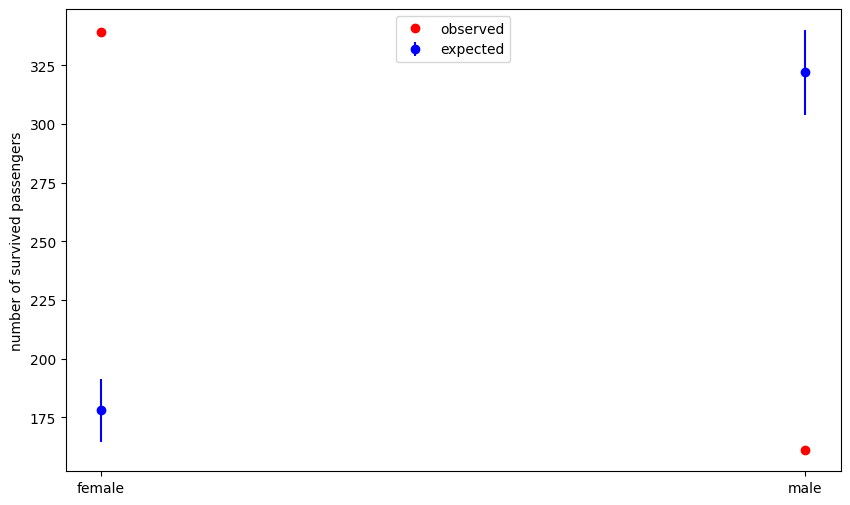

In [12]:
plt.figure(figsize=(10,6), dpi=100)
plt.errorbar(c_tab.index[:-1], c_tab.exp_1[:-1], 
    yerr=np.sqrt(c_tab.exp_1)[:-1], 
    fmt='o', color='b', label='expected')
plt.plot(c_tab.index[:-1], c_tab[1][:-1], 'ro', zorder=10, label='observed')
plt.ylabel('number of survived passengers')
plt.legend(loc='upper center')
plt.show()

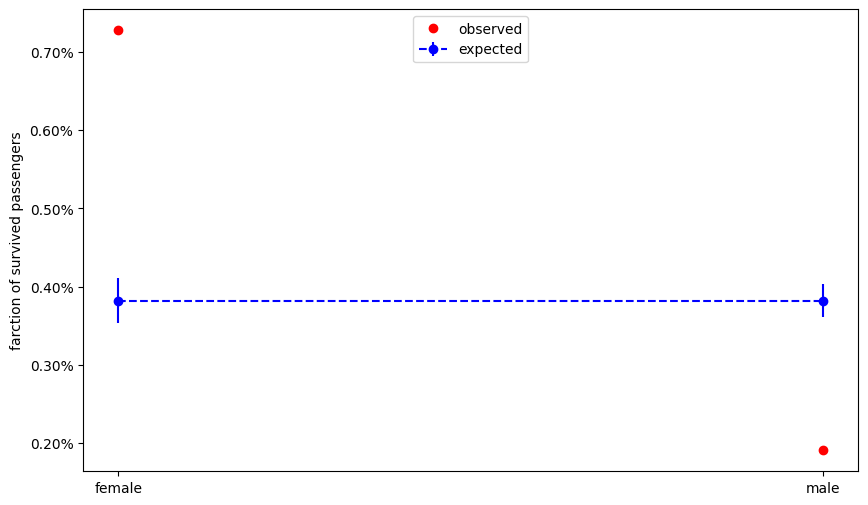

In [13]:
import matplotlib.ticker as mtick
plt.figure(figsize=(10,6), dpi=100)
plt.errorbar(c_tab.index[:-1], (c_tab.exp_1/c_tab.tot)[:-1],
    yerr=(np.sqrt(c_tab.exp_1)/c_tab.tot)[:-1],
    fmt='--o', color='b', label='expected')
plt.plot(c_tab.index[:-1], c_tab.frac_1[:-1], 'ro', zorder=10, label='observed')
plt.ylabel('farction of survived passengers')
plt.legend(loc='upper center')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [14]:
c_0_2 = c_tab['resid_0_sq_norm'].sum()
c_1_2 = c_tab['resid_1_sq_norm'].sum()
print("chi^2 partial sums: {:.3f}, {:.3f}".format(c_0_2, c_1_2))
c2 = c_1_2
print("chi^2 = {:.3f}".format(c2))

chi^2 partial sums: 139.758, 226.129
chi^2 = 226.129


Il calcolo della cumulativa viene approssimato a zero:

In [15]:
ndof = (2-1)*(2-1)
1 - chi2.cdf(c2, ndof)

np.float64(0.0)

Meglio usare la funzione ```sf``` che ha un'implementazione più accurata:

In [16]:
p = chi2.sf(c2, ndof)
print("p = ",p)

p =  4.1651155860234655e-51


In [17]:
from scipy.stats import norm
z = -norm.ppf(p)
print("Z = {:.2f}σ".format(z))

Z = 14.99σ


La significatività super di gran lunga quella necessaria per dichiarare una scoperta ($5\sigma$), come era evidente dai dati.

Possiamo usare anche la funzione ```chisquare``` per calcolare il $\chi^2$ in base alle frequenze osservate e quelle attese.

In [18]:
from scipy.stats import chisquare
f_0_obs = contigency[0]
f_1_obs = contigency[1]
f_1 = contigency[1].sum()/(contigency[0].sum()+contigency[1].sum())
f_1_exp = f_1*(contigency[0]+contigency[1])
f_0 = contigency[0].sum()/(contigency[0].sum()+contigency[1].sum())
f_0_exp = f_0*(contigency[0]+contigency[1])
chi2_obs = chisquare(f_1_obs, f_exp=f_1_exp)
print("chi2 = {:.2f}, p-value = {:.2e}".format(chi2_obs.statistic, chi2_obs.pvalue))

chi2 = 226.13, p-value = 4.17e-51


# Spunti per esercizi

* calcolare il $p$-value dell'ipotesi nulla che la mortalità sul Titanic sia la stessa in 1^, 2^ e 3^ classe.

* Vogliamo testarese la distribuzione dei rigori in Serie A *a favore* delle varie squadre sia uniforme oppure no. Applichiamo il test del $\chi^2$ per diversi insiemi di dati:
* Juventus, Inter, Milan, Roma e Napoli per gli ultimi 11 anni
* Juventus, Inter, Milan, Roma e Napoli per gli ultimi 3 anni

In [77]:
import pandas as pd
df = pd.read_csv('data/penalty.csv')
df

,Years,Napoli,Juventus,Roma,Inter,Lazio,Milan,Fiorentina,Udinese,Bologna
0,11,10,5,13,6,5,6,4,7,4
1,12,9,4,4,11,7,10,8,5,3
2,13,11,11,7,5,9,11,10,6,5
3,14,9,4,6,1,8,5,12,8,6
4,15,9,9,7,7,5,11,7,1,0
5,16,8,9,4,3,11,7,9,4,3
6,17,8,3,14,5,14,12,10,3,2
7,18,8,8,6,7,11,6,8,7,3
8,19,4,8,6,9,6,4,6,8,5
9,20,5,14,14,11,18,9,11,0,6


Escludiamo le squadre meno forti, che potrebbero essere meno propense a ricevere rigori a favore.

In [78]:
df = df.drop(['Bologna', 'Udinese', 'Fiorentina', 'Years'], axis=1)
df

,Napoli,Juventus,Roma,Inter,Lazio,Milan
0,10,5,13,6,5,6
1,9,4,4,11,7,10
2,11,11,7,5,9,11
3,9,4,6,1,8,5
4,9,9,7,7,5,11
5,8,9,4,3,11,7
6,8,3,14,5,14,12
7,8,8,6,7,11,6
8,4,8,6,9,6,4
9,5,14,14,11,18,9


In [79]:
penalties = df.sum()
penalties

Napoli      137
Juventus    106
Roma        121
Inter       107
Lazio       131
Milan       130
dtype: int64

In [80]:
penalties.sum()

np.int64(732)

In [81]:
penalties.count()

np.int64(6)

In [82]:
penalties_exp = penalties.sum()/penalties.count()
print("expected: {:.2f}".format(penalties_exp))

expected: 122.00


In [83]:
f = penalties.values
chi2_obs = chisquare(f, f_exp=np.full_like(f, penalties_exp, dtype=np.float64))
print("chi2 = {:.2f}, p-value = {:.3f}".format(chi2_obs.statistic, chi2_obs.pvalue))

chi2 = 6.98, p-value = 0.222


Il $p$-value è maggiore di es.: 0.05, per cui non è possibile escludere l'ipotesi che i rigori a favore siano distribuiti equamente tra le varie squadre considerate.

Consideriamo solo alcune squadre e gli ultimi anni:

In [98]:
df = pd.read_csv('data/penalty.csv')[['Napoli', 'Inter', 'Juventus', 'Milan']][11:]
df

,Napoli,Inter,Juventus,Milan
11,13,11,6,8
12,10,5,6,5
13,10,9,5,8
14,5,8,4,8


In [99]:
penalties = df.sum()
penalties_exp = penalties.sum()/penalties.count()
f = penalties.values
chi2_obs = chisquare(f, f_exp=np.full_like(f, penalties_exp, dtype=np.float64))
print("chi2 = {:.2f}, p-value = {:.3f}".format(chi2_obs.statistic, chi2_obs.pvalue))

chi2 = 5.12, p-value = 0.164
